In [20]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/steffi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
#Lade Dataframe:
df = pd.read_hdf('df_prep.h5')
df

,idn,title,date,lang,urn,title_clean
0,1317002237,Ängste der Allgemeinbevölkerung in Zeiten der ...,2024,ger,urn:nbn:de:bsz:14-qucosa2-890970,Ängste Allgemeinbevölkerung Zeiten COVID-19-Pa...
1,131701071X,Auswirkungen der COVID-19-Pandemie auf die Pri...,2024,ger,urn:nbn:de:bsz:16-heidok-342525,Auswirkungen COVID-19-Pandemie Primärversorgun...
2,1319384919,Auswirkungen der SARS-CoV-2-Pandemie auf die B...,2024,ger,urn:nbn:de:bvb:19-331095,Auswirkungen SARS-CoV-2-Pandemie Bedürfnisse P...
3,1319553818,Beeinträchtigung des Gesichtsfeldes durch das ...,2024,ger,urn:nbn:de:101:1-2024021604063338639840,Beeinträchtigung Gesichtsfeldes Tragen Mund-Na...
4,131589002X,Der Serotonin-Wiederaufnahmehemmer Fluoxetin...,2024,ger,urn:nbn:de:bvb:20-opus-347190,Der Serotonin-Wiederaufnahmehemmer Fluoxetin...
...,...,...,...,...,...,...
2890,1275808069,Zur Rolle von Unterhaltungsmagazinen in der Pa...,2022,ger,urn:nbn:de:101:1-2022121621092079245245,Zur Rolle Unterhaltungsmagazinen Pandemie Zwis...
2891,1308344058,Zur seelischen Gesundheit von Studierenden – E...,2023,ger,urn:nbn:de:101:1-2023110209541661089956,Zur seelischen Gesundheit Studierenden – Eine ...
2892,1276936842,"Zusammenhänge zwischen sozialer Herkunft, Unte...",2022,ger,urn:nbn:de:101:1-2022123109195820053242,Zusammenhänge sozialer Herkunft Unterrichtsfor...
2893,1280215933,Zuteilung knapper Intensivkapazitäten in der P...,2022,ger,urn:nbn:de:101:1-2023020621022586089746,Zuteilung knapper Intensivkapazitäten Pandemie...


In [8]:
# Zähle Wörter in "title_clean"-Spalte
word_counts = df['title_clean'].value_counts()


In [10]:
print(word_counts)

Saudi-Arabien Pandemie Öl Wirtschaftskrise zwingt Kronprinzen Reformprogramm aggressiver Regionalpolitik wählen                               2
Wundmale Postdemokratie Zur gesellschaftlichen Bedingtheit Verschwörungstheorien Pandemie                                                     2
Das Europäische Parlament Corona-Pandemie Krise EP meist Zuschauer                                                                          2
Wiederaufbau Syrien Herausforderungen Handlungsoptionen EU Mitgliedstaaten                                                                    2
Chinas Gesundheitsdiplomatie Zeiten Corona Seidenstraßeninitiative (BRI) Aktion                                                               2
                                                                                                                                             ..
Ausblick                                                                                                                                

In [21]:
#Aternative: 
#Tokenisierung der Sätze in der Spalte 'title_clean' und Zusammenfassung aller Wörter in einer Liste
all_words = []

for sentence in df['title_clean']:
    words = word_tokenize(sentence)  # Tokenisierung des Satzes in einzelne Wörter
    all_words.extend(words)  # Hinzufügen der Wörter zur Liste aller Wörter

In [23]:
word_counts = Counter(all_words)

In [24]:
print(word_counts)

Counter({'Corona-Pandemie': 393, 'Pandemie': 362, 'COVID-19-Pandemie': 251, '–': 246, '(': 237, ')': 236, ':': 219, '\x98Die\x9c': 188, 'Corona': 173, 'Zeiten': 172, 'COVID-19': 152, 'Auswirkungen': 143, '2021': 136, 'Deutschland': 124, '2020': 115, "''": 111, '``': 103, 'Eine': 101, 'Ergebnisse': 99, '„': 94, '“': 92, 'Corona-Krise': 80, 'Die': 80, 'the': 78, 'Krise': 77, 'of': 73, 'Covid-19-Pandemie': 72, 'Wie': 68, 'Covid-19': 65, 'Herausforderungen': 64, 'Ein': 55, 'ersten': 54, 'and': 52, 'Menschen': 51, '*': 50, 'Entwicklung': 47, 'Folgen': 47, 'Gesundheit': 46, 'Arbeit': 46, ',': 46, 'Lehre': 45, '\x98Das\x9c': 45, 'Digitalisierung': 43, 'Kontext': 43, 'Befragung': 43, 'Zukunft': 42, '\x98Der\x9c': 41, 'Beispiel': 41, 'Studie': 41, 'Perspektiven': 40, 'Analyse': 39, 'Erfahrungen': 37, 'digitalen': 37, 'SARS-CoV-2-Pandemie': 36, 'Einfluss': 36, 'Coronapandemie': 36, 'innen': 36, 'Deutschen': 35, ';': 35, 'Das': 33, 'Bildung': 33, 'Digitale': 33, '.': 33, 'Kindern': 32, 'Versorgun

In [39]:
#wordcount = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Frequency'])
#wordcount

In [38]:
# Sortieren: 
#wordcounts_sorted = wordcount.sort_values(by='Frequency', ascending=False)
#wordcounts_sorted


In [41]:
# 100 häufigste Wörter:
#top_100 = wordcounts_sorted.head(100)
#top_100

In [42]:
#Erstelle Wordcloud:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)



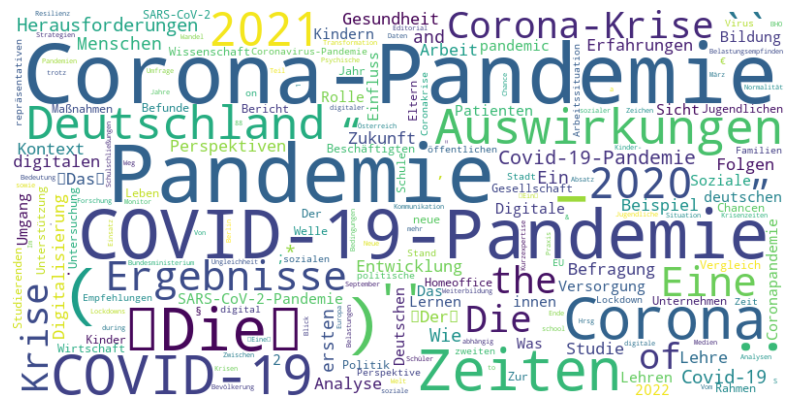

In [43]:
# Anzeige der Wordcloud:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()